In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, norm
import scipy.stats as stats
import plotly.express as px

In [ ]:
w_s_prices=pd.read_csv("/content/World-Stock-Prices-Dataset.csv")
print(w_s_prices["Capital Gains"].unique())
w_s_prices.drop(columns="Capital Gains",inplace=True)
w_s_prices["Date"]=pd.to_datetime(w_s_prices["Date"],utc=True)
w_s_prices

[nan  0.]


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa


In [ ]:
def Daily_Turnover(close,volume):
    turnover=close*volume
    return turnover
Turnover=Daily_Turnover(w_s_prices["Close"],w_s_prices["Volume"])
print(Turnover)
w_s_prices["year"]=w_s_prices["Date"].dt.year
w_s_prices["Turnover"]=Turnover
turnover_per_company = w_s_prices.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
avg_turnover_per_company=w_s_prices.groupby("Brand_Name")["Turnover"].mean().reset_index()
avg_turnover_per_company

0         1.392546e+08
1         1.857922e+08
2         2.027941e+09
3         6.892023e+09
4         8.111129e+07
              ...     
228239    1.144305e+08
228240    2.484215e+08
228241    2.015956e+07
228242    3.718267e+08
228243             NaN
Length: 228244, dtype: float64


,Brand_Name,Turnover
0,3m,3.361036e+08
1,adidas,4.775056e+06
2,adobe,6.680399e+08
3,airbnb,8.407957e+08
4,amazon,4.788112e+09
...,...,...
56,ubisoft,6.984546e+05
57,unilever,6.213248e+07
58,visa,9.925289e+08
59,zoom video communications,8.695851e+08


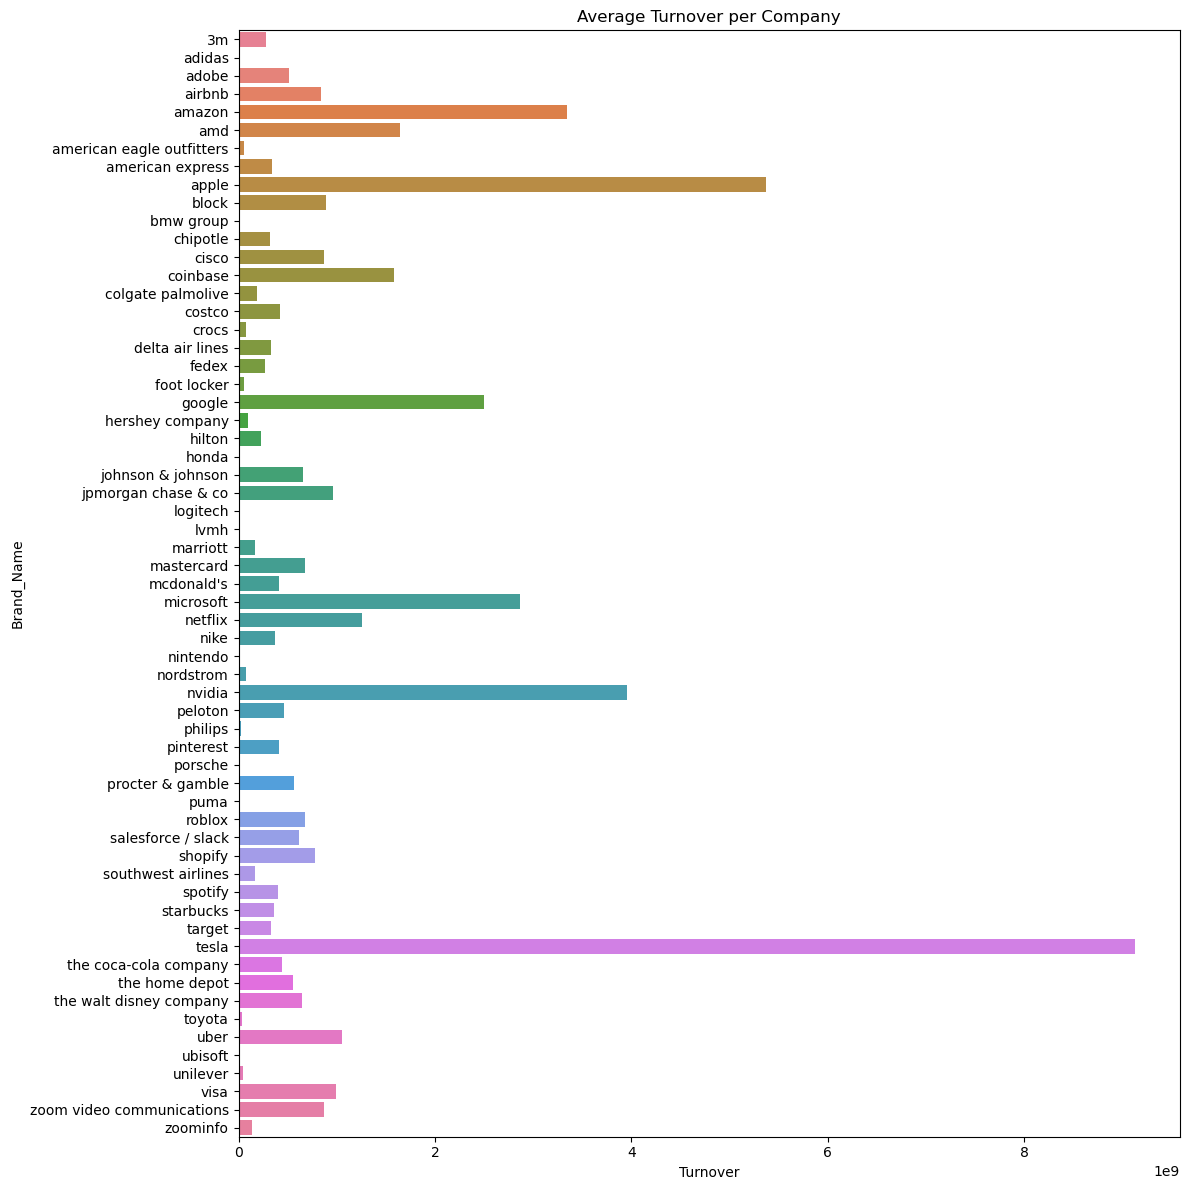

In [ ]:
plt.figure(figsize=(12, 12))
sns.barplot(data=avg_turnover_per_company, x="Turnover", y="Brand_Name",hue="Brand_Name")
plt.title("Average Turnover per Company")
plt.tight_layout()
plt.show()

# #Analysis of Average Turnover per Company-
#The barplot shows the average daily turnover for each brand across the available years.

#**Tesla, Apple, The Coca-Cola Company, Amazon, Nvidia, Microsoft**, and Google are the companies with the highest average turnovers,clearly standing out from others.

#These top brands demonstrate significantly higher trading activities compared to the rest,indicating they are more actively traded stocks with higher market liquidity.

#Many other companies, such as Crocs, Southwest Airlines, Pinterest, and Peloton,show much lower average turnovers,suggesting less trading volume and possibly lower investor interest.

#The turnover distribution is highly skewed: only a few companies dominate the turnover volume while the majority maintain low turnover.

#This indicates a concentration of market activity around major technology, automotive, and consumer goods companies.
## Conclusion-
#The results underline the importance of brand reputation, industry sector, and market capitalization in influencing stock market activity.

#For further investment or trading strategy development, **focusing on the high-turnover companies** could offer better opportunities for liquidity and shorter execution times.

In [ ]:
DF=avg_turnover_per_company.sort_values(by="Turnover",ascending=False)
top_5_companies=DF.head(5)
top_5_companies

,Brand_Name,Turnover
50,tesla,9.128518e+09
8,apple,5.373250e+09
36,nvidia,3.958805e+09
4,amazon,3.345749e+09
31,microsoft,2.864485e+09


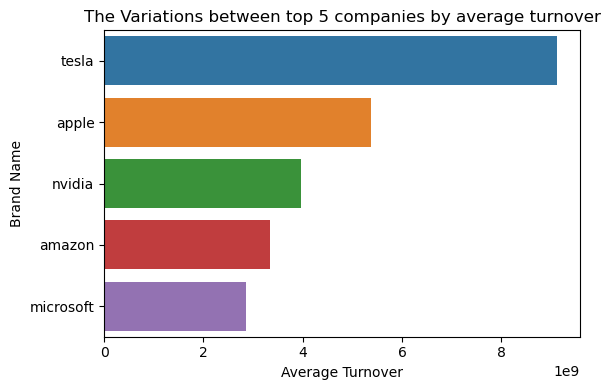

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=top_5_companies, x="Turnover", y="Brand_Name",hue="Brand_Name")
plt.title("The Variations between top 5 companies by average turnover")
plt.xlabel("Average Turnover")
plt.ylabel("Brand Name")
plt.tight_layout()
plt.show()

## Analysis of Top 5 Companies by Average Turnover-
The bar plot illustrates the top 5 companies with the highest average turnover based on the dataset.
Key observations:

1/**Tesla** holds the highest average turnover, significantly outperforming the others.

2/Apple ranks second, though its turnover is notably lower compared to Tesla.

3/Nvidia, Amazon, and Microsoft follow, with turnovers decreasing sequentially.

4/The turnover difference between Tesla and the rest is substantial, indicating Tesla's highly liquid trading activity.

5/The turnovers of Nvidia, Amazon, and Microsoft are relatively closer to each other compared to Tesla and Apple.

For future investment or trading strategies, focusing on the high-turnover companies such as Tesla and Apple could offer better liquidity and faster
transaction execution.

In [ ]:
turnover_per_company = w_s_prices.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
turnover_per_company

,year,Brand_Name,Turnover
0,2000,3m,2.086259e+10
1,2000,adobe,6.181209e+10
2,2000,amazon,1.030174e+11
3,2000,amd,7.051560e+10
4,2000,american eagle outfitters,5.176764e+09
...,...,...,...
1256,2025,ubisoft,3.417787e+07
1257,2025,unilever,8.046019e+09
1258,2025,visa,1.120437e+11
1259,2025,zoom video communications,1.191916e+10


In [ ]:
sorted_turnover_per_company = turnover_per_company.sort_values(["Brand_Name", "year"])
sorted_turnover_per_company

,year,Brand_Name,Turnover
0,2000,3m,2.086259e+10
34,2001,3m,2.982290e+10
68,2002,3m,4.090281e+10
103,2003,3m,4.020529e+10
138,2004,3m,3.553963e+10
...,...,...,...
1016,2021,zoominfo,4.645439e+10
1077,2022,zoominfo,4.389190e+10
1138,2023,zoominfo,3.239672e+10
1199,2024,zoominfo,2.457006e+10


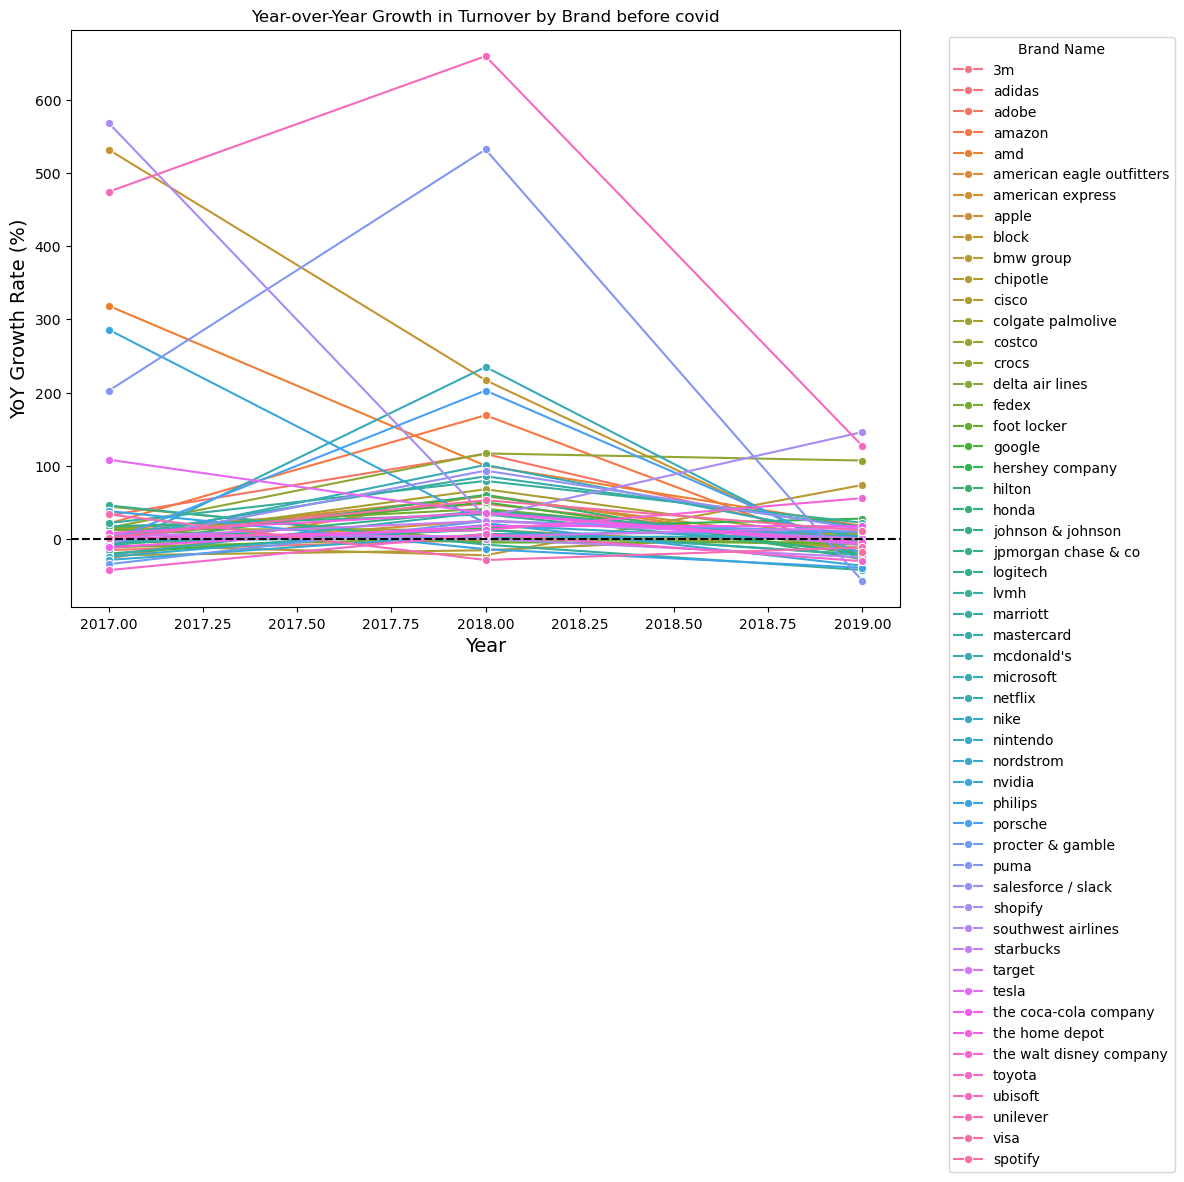

In [ ]:
filtered=w_s_prices[(w_s_prices['Date'].dt.year >= 2016) & (w_s_prices['Date'].dt.year <= 2019)]
Before_covid= filtered.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
growth_data = []
for brand in Before_covid["Brand_Name"].unique():
    df_brand = Before_covid[Before_covid["Brand_Name"] == brand].sort_values("year")


    for i in range(1, len(df_brand)):
        current_year = df_brand.iloc[i]["year"]
        current_turnover = df_brand.iloc[i]["Turnover"]
        previous_turnover = df_brand.iloc[i-1]["Turnover"]


        yoy_growth = ((current_turnover - previous_turnover) / previous_turnover) * 100
        growth_data.append({
            "Brand_Name": brand,
            "year": current_year,
            "YoY_Growth (%)": yoy_growth
        })
yoy_df = pd.DataFrame(growth_data)

plt.figure(figsize=(12, 10))
sns.lineplot(data=yoy_df, x="year", y="YoY_Growth (%)", hue="Brand_Name", marker="o")
plt.title("Year-over-Year Growth in Turnover by Brand before covid")
plt.xlabel("Year", fontsize=14)
plt.ylabel("YoY Growth Rate (%)", fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.legend(title="Brand Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Analysis of year over year growth rate before covid-
Figure: Year-over-Year Growth in Turnover by Brand (2017–2019)
This chart shows how different brands' turnover (total revenue) changed each year before the COVID-19 pandemic.

**From 2017 to 2018**, many brands such as **Tesla, Netflix, Amazon, and 3M** showed **very strong growth** in turnover, some with over 500% increases. This suggests that these companies were expanding quickly during that period.

However,**in 2019**, **growth slowed down for most brands.** Some, **like Spotify, Southwest Airlines, Honda, and Nintendo,** showed **lower or even negative growth.** This means their revenue either stayed the same or dropped compared to the previous year.

#Key points:

1/High growth in 2018: Brands like **Tesla, Amazon, Netflix, and 3M** stood out with very high turnover growth.

2/Slower or negative growth in 2019: Companies like **Spotify, Puma, Southwest Airlines,** and Unilever experienced less growth or decline.

3/Most other brands had small changes, showing stable but less dramatic shifts in revenue.

**This analysis helps us understand which companies were growing fast and which were slowing down just before the pandemic hit in 2020.**

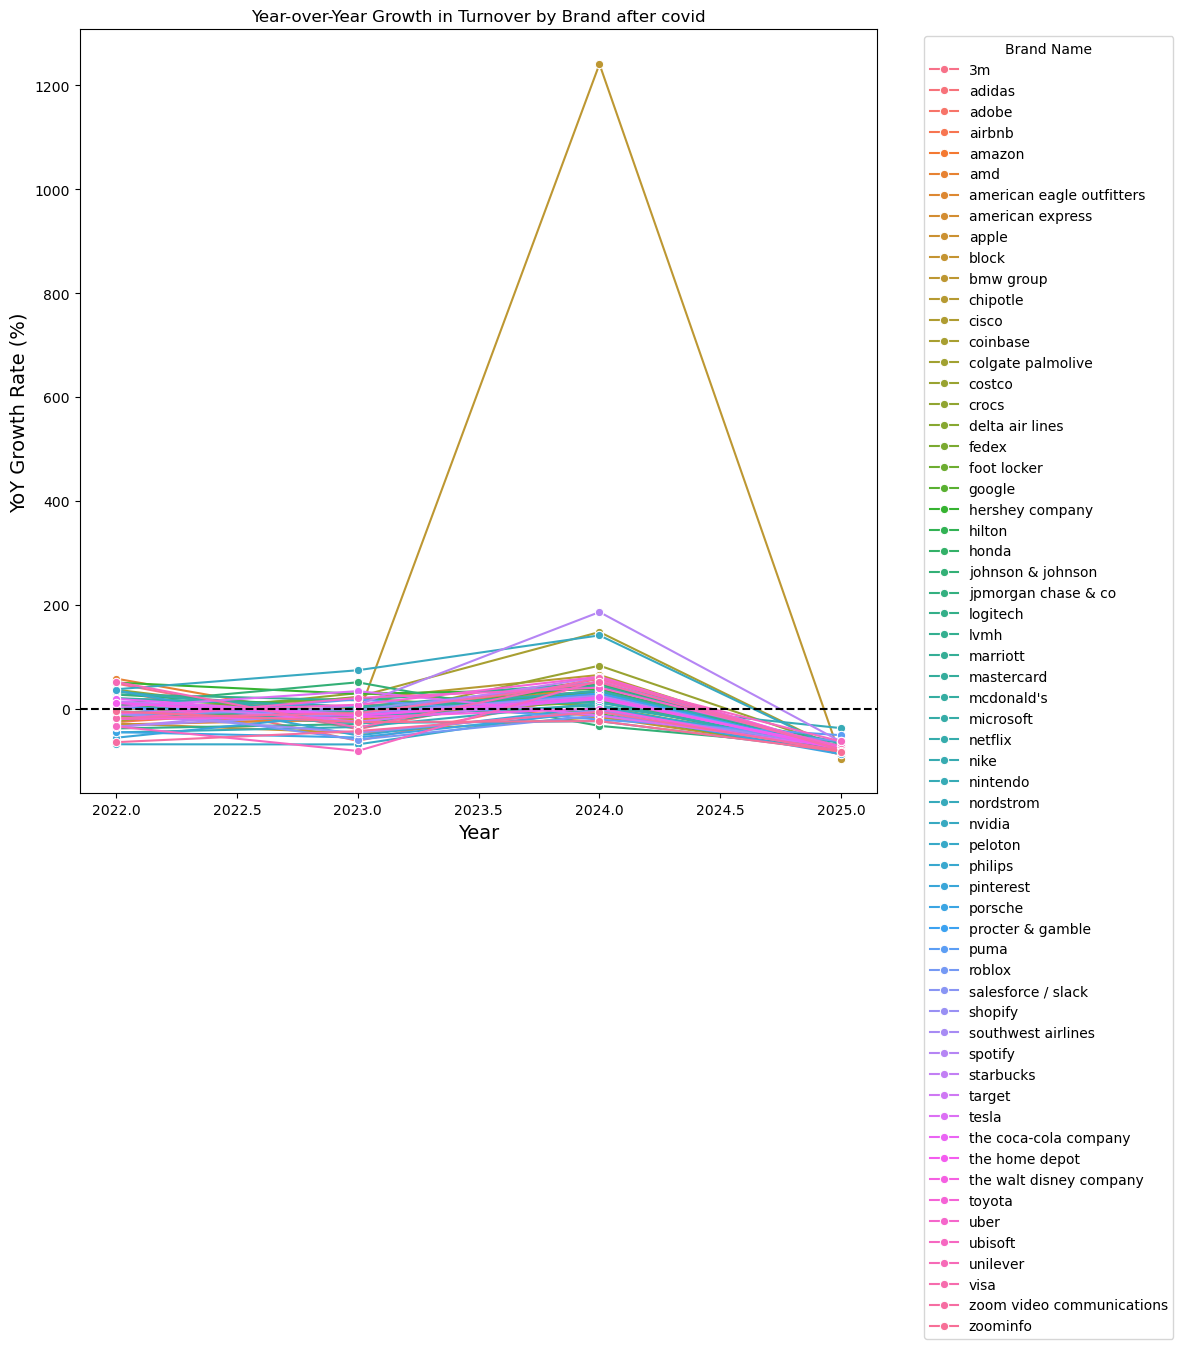

In [ ]:
filtered_df=w_s_prices[(w_s_prices['Date'].dt.year >= 2021) & (w_s_prices['Date'].dt.year <= 2025)]
After_covid= filtered_df.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
growth_data = []
for brand in After_covid["Brand_Name"].unique():
    df_brand = After_covid[After_covid["Brand_Name"]==brand].sort_values("year")


    for i in range(1, len(df_brand)):
        current_year = df_brand.iloc[i]["year"]
        current_turnover = df_brand.iloc[i]["Turnover"]
        previous_turnover = df_brand.iloc[i-1]["Turnover"]


        YOY_growth = ((current_turnover - previous_turnover) / previous_turnover) * 100
        growth_data.append({
            "Brand_Name": brand,
            "year": current_year,
            "YoY_Growth (%)": YOY_growth
        })
YoY_df = pd.DataFrame(growth_data)

plt.figure(figsize=(12, 12))
sns.lineplot(data=YoY_df, x="year", y="YoY_Growth (%)", hue="Brand_Name", marker="o")
plt.title("Year-over-Year Growth in Turnover by Brand after covid")
plt.xlabel("Year", fontsize=14)
plt.ylabel("YoY Growth Rate (%)", fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.legend(title="Brand Name", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Analysis of year over year growth rate After covid-
Figure: Year-over-Year Growth in Turnover by Brand (2022–2025)
This chart shows how different brands' turnover (total revenue) changed each year after the COVID-19 pandemic.

**In 2023 and 2024,** several brands, including **Cisco, Coinbase, and Airbnb, showed high growth in turnover**. For example, Cisco saw a sharp increase of over 1200% in 2024, possibly due to strong recovery or a one-time business boost.

However, **in 2025, many of these brands showed a decline or slowdown.** Some brands even experienced negative growth,**meaning their revenue dropped compared to the previous year.**

Brands like **Logitech, Philips, and Zoom** continued to show weak or **negative growth across the years,** which could be due to reduced demand for remote work and tech tools post-pandemic.

#Key points:

**Strong recovery in 2024:** Brands like **Cisco, Airbnb, and Coinbase** saw **major spikes in revenue growth,** likely from post-pandemic market rebounds.

**Decline in 2025:** Most **brands, including high performers from earlier years,** faced a drop or **slowdown in turnover growth.**

**Consistent underperformance:** Companies such as **Logitech, Zoom, Philips, and Pinterest showed negative or flat growth throughout,** hinting at struggles **in the post-COVID market.**

**Overall trend: After an initial boost in 2023–2024, many brands appear to return to normal growth rates or face new market challenges in 2025.**

In [ ]:
Before_covid

,year,Brand_Name,Turnover
0,2016,3m,6.739959e+10
52,2017,3m,7.613629e+10
104,2018,3m,1.126629e+11
157,2019,3m,1.038172e+11
1,2016,adidas,1.671159e+09
...,...,...,...
51,2016,visa,1.764264e+11
103,2017,visa,1.797296e+11
156,2018,visa,2.747842e+11
212,2019,visa,3.061194e+11


In [ ]:
yoy_df

,Brand_Name,year,YoY_Growth (%)
0,3m,2017,12.962542
1,3m,2018,47.975354
2,3m,2019,-7.851488
3,adidas,2017,-14.997583
4,adidas,2018,-1.596408
...,...,...,...
152,unilever,2019,-11.487698
153,visa,2017,1.872297
154,visa,2018,52.887560
155,visa,2019,11.403558


In [ ]:
YoY_df

,Brand_Name,year,YoY_Growth (%)
0,3m,2022,-82.779135
1,3m,2023,-82.779135
2,3m,2024,-82.779135
3,3m,2025,-82.779135
4,adidas,2022,-82.779135
...,...,...,...
239,zoom video communications,2025,-82.779135
240,zoominfo,2022,-82.779135
241,zoominfo,2023,-82.779135
242,zoominfo,2024,-82.779135


In [ ]:
turnover_per_company= w_s_prices.groupby("Brand_Name")["Turnover"].mean().reset_index()
print(turnover_per_company.columns)
turnover_per_company["total_mean_turnover"]=turnover_per_company["Turnover"].sum()
turnover_per_company["turnovers_%"]=(turnover_per_company["Turnover"]/turnover_per_company["total_mean_turnover"])*100
turnover_per_company

Index(['Brand_Name', 'Turnover'], dtype='object')


,Brand_Name,Turnover,total_mean_turnover,turnovers_%
0,3m,3.361036e+08,5.989151e+10,0.561187
1,adidas,4.775056e+06,5.989151e+10,0.007973
2,adobe,6.680399e+08,5.989151e+10,1.115417
3,airbnb,8.407957e+08,5.989151e+10,1.403865
4,amazon,4.788112e+09,5.989151e+10,7.994642
...,...,...,...,...
56,ubisoft,6.984546e+05,5.989151e+10,0.001166
57,unilever,6.213248e+07,5.989151e+10,0.103742
58,visa,9.925289e+08,5.989151e+10,1.657211
59,zoom video communications,8.695851e+08,5.989151e+10,1.451934


In [ ]:
fig = px.pie(
    turnover_per_company,
    names="Brand_Name",
    values="turnovers_%",
    hover_data=["total_mean_turnover"],
    title="Brand-wise Mean Turnover Contribution"
)
fig.update_layout(
    width=1000,
    height=800,
    legend_title="Brand Names",
   )
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


## Brand-wise Mean Turnover Contribution Analysis
The pie chart illustrates the average turnover contribution of each brand relative to the total mean turnover across all brands.
It is evident that:

1/**Tesla leads** significantly,contributing approximately 18.1% of the total mean turnover.

2/**Apple** follows with around 10.7%, and **Nvidia** holds a substantial share of about 7.86%.

3/other **major contributors** include **Amazon**(6.64%), **Microsoft**(5.69%) and Google**(4.96%)**.

5/On the other hand, a large number of brands contribute very small individual shares like-**Spotify**(0.79%), **Nike**(0.73%), **Airbnb**(0.64%), and **Roblox**(0.62%) showed relatively **low turnover** contributions, **each below 1%**.
The distribution suggests a high concentration of turnover among the top few brands, while the rest of the brands have a more fragmented and smaller share.

#**Overall**, the turnover market appears top-heavy, dominated by a handful of brands, indicating their stronger market presence compared to others
## Conclusion
The analysis clearly shows that a few key brands dominate the overall mean turnover contribution.
Brands like **Tesla, Apple, Nvidia, and Amazon** have established a strong market position, accounting for a significant portion of the total turnover.
Meanwhile, most other brands contribute smaller individual shares, indicating a competitive but uneven market structure.
This highlights the importance of market leadership and innovation in maintaining a dominant turnover share in a highly competitive industry.

In [ ]:
turnover_per_company[turnover_per_company["Brand_Name"]=="tesla"]["turnovers_%"]

50    18.12127
Name: turnovers_%, dtype: float64

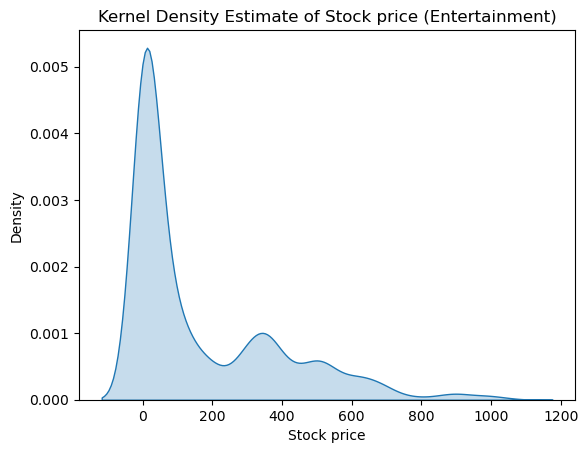

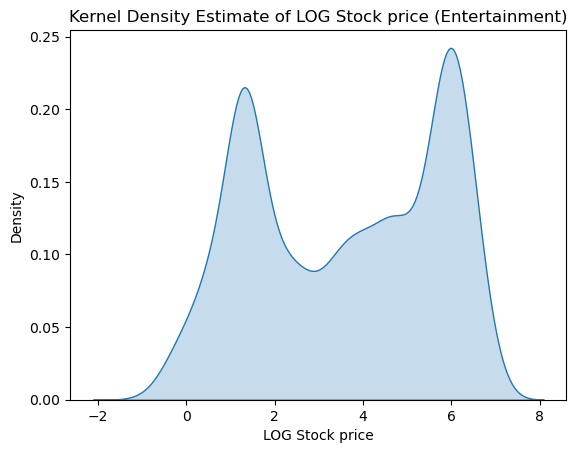

1.6448536269514722


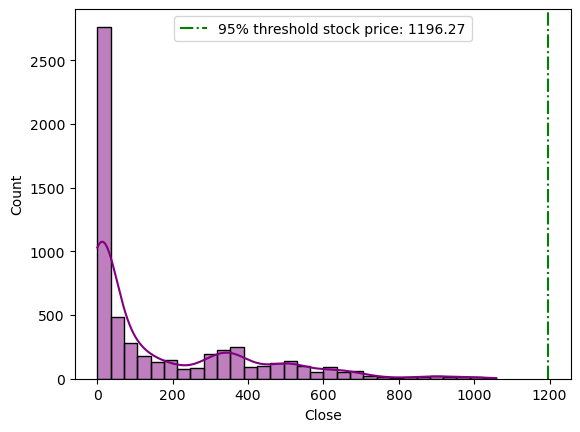

the threshold price that 95% of its daily closing prices will not exceed. 1196.27
the maximum expected price that will not be exceeded 95% of the time: 1146.07


In [ ]:
# 1/Predicting a Company’s Stock Price Fluctuation-
# A company in the entertainment industry (e.g., Netflix) observes that its stock price follows a log-normal distribution.
# The company wants to assess the price threshold that 95% of its daily closing prices will not exceed.
# If the mean closing price is $850 and the standard deviation is $180, what is the maximum expected price that will not be exceeded 95% of the time?

df=w_s_prices[w_s_prices["Industry_Tag"]=="entertainment"]
stock_price=df[df["Brand_Name"]== "netflix"]["Close"]
sns.kdeplot(stock_price,fill=True)
plt.title("Kernel Density Estimate of Stock price (Entertainment)")
plt.xlabel("Stock price")
plt.ylabel("Density")
plt.show()

## convert to log-
log_stock_price=np.log(stock_price)
sns.kdeplot(log_stock_price,fill=True)
plt.title("Kernel Density Estimate of LOG Stock price (Entertainment)")
plt.xlabel("LOG Stock price")
plt.ylabel("Density")
plt.show()

##required variables-
m=log_stock_price.mean()
sd=log_stock_price.std()
z=stats.norm.ppf(0.95)
print(z)

##calculating(x) ans-
Threshold_log=z*sd+m

#converting ans back to form in which data esist-
thre_stock_price=np.exp(Threshold_log)
sns.histplot(stock_price,bins=30,kde=True,color="purple")
plt.axvline(thre_stock_price, color="green", linestyle="dashdot", label=f"95% threshold stock price: {thre_stock_price:.2f}")
plt.legend()
plt.show()

print(f"the threshold price that 95% of its daily closing prices will not exceed. {thre_stock_price:.2f}")

# If the mean closing price is $850 and the standard deviation is $180, what is the maximum expected price that will not be exceeded 95% of the time?
mu=850
sigma=180
X=stats.norm.ppf(0.95,mu,sigma)

print(f"the maximum expected price that will not be exceeded 95% of the time: {X:.2f}")


## Predicting Stock Price Fluctuation for an Entertainment Company (e.g., Netflix)
To understand stock price behavior in the entertainment industry, a log-normal model was applied to analyze Netflix’s closing stock prices:

## Distribution Analysis:
The first kernel density plot shows that Netflix's raw stock prices are positively skewed, with a sharp peak around lower values and a long tail towards
higher prices.

After applying a logarithmic transformation, the distribution becomes more symmetrical and bell-shaped, confirming the assumption of a log-normal
distribution—a common model for stock prices.

Threshold Prediction (95% Confidence):

Using the mean and standard deviation of the log-transformed stock prices, the 95th percentile was calculated and then exponentiated to return to the
original price scale.

The analysis shows that 95% of Netflix’s daily closing stock prices are expected to remain below approximately $1198.27.

This threshold is visually marked with a vertical green dashed line on the histogram, indicating the upper limit for most typical price movements.

Normal vs Log-Normal Comparison:

For comparison, assuming a normal distribution with a mean of $850 & a standard deviation of $180, the 95% threshold is about $1,145.67.

## This comparison highlights how the log-normal model provides a slightly higher and more realistic upper bound for stock prices, especially in the
## presence of right-skewed data.

In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa


In [ ]:
w_s_prices["Industry_Tag"].unique()

array(['fitness', 'footwear', 'food & beverage', 'entertainment',
       'technology', 'retail', 'manufacturing', 'logistics',
       'cryptocurrency', 'consumer goods', 'healthcare', 'finance',
       'food', 'hospitality', 'luxury goods', 'financial services',
       'apparel', 'gaming', 'aviation', 'automotive', 'e-commerce',
       'social media', 'music'], dtype=object)

## The analysis of effect of pandemic period(covid)

In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa


In [ ]:
filtered_data = w_s_prices[(w_s_prices['Date'].dt.year >= 2020) & (w_s_prices['Date'].dt.year <= 2022)]

In [ ]:
filtered_data.sort_values(by="Date")

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
81081,2020-01-02 05:00:00+00:00,142.000000,142.350006,141.529999,142.240005,118100.0,0.0,0.0,toyota,TM,automotive,japan
81049,2020-01-02 05:00:00+00:00,124.782471,125.951844,124.309372,125.942909,10803700.0,0.0,0.0,jpmorgan chase & co,JPM,finance,usa
81048,2020-01-02 05:00:00+00:00,62.981501,63.072996,62.112351,62.322781,3441800.0,0.0,0.0,colgate palmolive,CL,consumer goods,usa
81047,2020-01-02 05:00:00+00:00,58.402893,58.858777,57.927187,58.511909,4459200.0,0.0,0.0,delta air lines,DAL,aviation,usa
81046,2020-01-02 05:00:00+00:00,88.461398,88.875475,88.169666,88.724899,104400.0,0.0,0.0,lvmh,LVMUY,luxury goods,france
...,...,...,...,...,...,...,...,...,...,...,...,...
35964,2022-12-30 05:00:00+00:00,77.841568,77.959312,76.742579,77.311699,2238600.0,0.0,0.0,colgate palmolive,CL,consumer goods,usa
35963,2022-12-30 05:00:00+00:00,62.299999,62.450001,61.689999,62.250000,233800.0,0.0,0.0,logitech,LOGI,technology,switzerland
35962,2022-12-30 05:00:00+00:00,26.459999,28.540001,26.459999,28.459999,15884700.0,0.0,0.0,roblox,RBLX,gaming,usa
35976,2022-12-30 05:00:00+00:00,171.998991,173.215346,169.645424,171.277100,1558300.0,0.0,0.0,fedex,FDX,logistics,usa


In [ ]:


def during_covid(open_price, close_price):
    return ((close_price - open_price)/ open_price )*100

filtered_data["Fluctuation%"] = filtered_data.apply(lambda row: during_covid(row["Open"], row["Close"]), axis=1)


C:\Users\TC\AppData\Local\Temp\ipykernel_9356\621694840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Fluctuation%"] = filtered_data.apply(lambda row: during_covid(row["Open"], row["Close"]), axis=1)


In [ ]:
filtered_data["Fluctuation%"]

35930    1.341414
35931   -0.629718
35932    2.550889
35933    0.675874
35934    1.058707
           ...   
81077   -2.073952
81078    0.845898
81079    0.749057
81080    0.141728
81081    0.169018
Name: Fluctuation%, Length: 45152, dtype: float64

In [ ]:
filtered_data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Fluctuation%
35930,2022-12-30 05:00:00+00:00,85.730003,87.120003,85.230003,86.879997,23231000.0,0.00,0.0,the walt disney company,DIS,entertainment,usa,1.341414
35931,2022-12-30 05:00:00+00:00,260.882756,261.059819,257.144599,259.239929,1720100.0,0.00,0.0,mcdonald's,MCD,food,usa,-0.629718
35932,2022-12-30 05:00:00+00:00,35.559798,36.910782,35.251002,36.466888,2850600.0,0.00,0.0,foot locker,FL,footwear,usa,2.550889
35933,2022-12-30 05:00:00+00:00,236.595628,238.333768,235.056129,238.194717,21938500.0,0.00,0.0,microsoft,MSFT,technology,usa,0.675874
35934,2022-12-30 05:00:00+00:00,83.120003,84.050003,82.470001,84.000000,62401200.0,0.00,0.0,amazon,AMZN,e-commerce,usa,1.058707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81077,2020-01-02 05:00:00+00:00,119.302921,119.451182,116.078014,116.828636,5149800.0,0.00,0.0,target,TGT,retail,usa,-2.073952
81078,2020-01-02 05:00:00+00:00,53.018997,53.496732,52.931249,53.467484,3713000.0,0.00,0.0,southwest airlines,LUV,aviation,usa,0.845898
81079,2020-01-02 05:00:00+00:00,43.085317,43.408051,42.923948,43.408051,16708100.0,0.35,0.0,cisco,CSCO,technology,usa,0.749057
81080,2020-01-02 05:00:00+00:00,46.592839,46.668310,46.300398,46.658875,604700.0,0.00,0.0,philips,PHG,technology,netherlands,0.141728


In [ ]:
during_covid=filtered_data.groupby("Brand_Name")["Fluctuation%"].mean()
during_covid

Brand_Name
3m                          -0.071966
adidas                      -0.037658
adobe                        0.002917
airbnb                       0.033651
amazon                      -0.048292
                               ...   
ubisoft                     -0.090846
unilever                     0.040021
visa                         0.005605
zoom video communications    0.094076
zoominfo                    -0.048366
Name: Fluctuation%, Length: 61, dtype: float64

In [ ]:
filtered=w_s_prices[(w_s_prices['Date'].dt.year >= 2000) & (w_s_prices['Date'].dt.year <= 2019)]

In [ ]:
filtered.sort_values(by="Date")


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
304604,2000-01-03 05:00:00+00:00,5.731675,5.793975,5.427959,5.482471,5825700.0,0.0,0.0,american eagle outfitters,AEO,apparel,usa
304584,2000-01-03 05:00:00+00:00,2.647906,2.659888,2.611962,2.632930,76000.0,0.0,0.0,logitech,LOGI,technology,switzerland
304583,2000-01-03 05:00:00+00:00,24.863424,25.071313,23.990294,24.239759,12019200.0,0.0,0.0,jpmorgan chase & co,JPM,finance,usa
304582,2000-01-03 05:00:00+00:00,2.360523,2.440855,2.298729,2.437765,24232000.0,0.0,0.0,starbucks,SBUX,food & beverage,usa
304581,2000-01-03 05:00:00+00:00,19.260617,19.260617,18.658722,18.733959,2434800.0,0.0,0.0,colgate palmolive,CL,consumer goods,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
81114,2019-12-31 05:00:00+00:00,198.494583,199.783736,197.891142,199.664886,3789900.0,0.0,0.0,the home depot,HD,retail,usa
81113,2019-12-31 05:00:00+00:00,140.860732,143.079091,140.417060,142.739258,2153400.0,0.0,0.0,fedex,FDX,logistics,usa
81112,2019-12-31 05:00:00+00:00,46.017387,46.149458,45.847581,46.036255,254000.0,0.0,0.0,philips,PHG,technology,netherlands
81125,2019-12-31 05:00:00+00:00,26.110416,26.202875,26.054941,26.175137,270500.0,0.0,0.0,honda,HMC,automotive,japan


In [ ]:
def before_covid(open_price,close_price):
    return((close_price-open_price)/open_price)*100

filtered["Fluctuation_%"]=filtered.apply(lambda row:before_covid(row["Open"],row["Close"]),axis=1)

C:\Users\TC\AppData\Local\Temp\ipykernel_9356\3536890769.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["Fluctuation_%"]=filtered.apply(lambda row:before_covid(row["Open"],row["Close"]),axis=1)


In [ ]:
before_covid=filtered.groupby("Brand_Name")["Fluctuation_%"].mean()

In [ ]:
before_covid

Brand_Name
3m                           0.029717
adidas                       0.076130
adobe                        0.087067
amazon                       0.096915
amd                         -0.073769
american eagle outfitters    0.028318
american express             0.032313
apple                        0.027140
block                        0.079314
bmw group                    0.028377
chipotle                     0.053197
cisco                        0.002081
colgate palmolive            0.050851
costco                       0.071944
crocs                        0.040597
delta air lines             -0.023846
fedex                        0.062310
foot locker                  0.043904
google                      -0.015576
hershey company              0.074782
hilton                       0.009441
honda                        0.008844
johnson & johnson            0.027785
jpmorgan chase & co          0.019166
logitech                     0.029553
lvmh                         0.106700
m

In [ ]:
filtered_df=w_s_prices[(w_s_prices['Date'].dt.year >= 2023) & (w_s_prices['Date'].dt.year <= 2025)]
filtered_df.sort_values(by="Date")

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
35929,2023-01-03 05:00:00+00:00,30.670000,31.049999,29.410000,29.440001,3246500.0,0.0,0.0,zoominfo,ZI,technology,usa
35895,2023-01-03 05:00:00+00:00,310.900044,312.663060,305.375879,309.421051,2822400.0,0.0,0.0,the home depot,HD,retail,usa
35894,2023-01-03 05:00:00+00:00,340.160004,345.820007,331.920013,336.920013,2229100.0,0.0,0.0,adobe,ADBE,technology,usa
35893,2023-01-03 05:00:00+00:00,5.740000,5.770000,5.650000,5.670000,198000.0,0.0,0.0,ubisoft,UBSFY,gaming,france
35892,2023-01-03 05:00:00+00:00,10.420000,10.750000,10.300000,10.500000,1061200.0,0.0,0.0,nintendo,NTDOY,gaming,japan
...,...,...,...,...,...,...,...,...,...,...,...,...
87,2025-03-07 05:00:00+00:00,77.480003,79.000000,76.970100,78.589996,7958888.0,0.0,0.0,nike,NKE,apparel,usa
88,2025-03-07 05:00:00+00:00,235.104996,241.369995,234.759995,239.070007,45520263.0,0.0,0.0,apple,AAPL,technology,usa
89,2025-03-07 05:00:00+00:00,199.500000,202.265305,192.539993,199.250000,58585210.0,0.0,0.0,amazon,AMZN,e-commerce,usa
91,2025-03-07 05:00:00+00:00,100.849998,103.495003,95.364998,100.129997,13668473.0,0.0,0.0,shopify,SHOP,e-commerce,canada


In [ ]:
def after_covid(open_price,close_price):
    return ((close_price-open_price)/open_price)*100

filtered_df["Fluctuation %"]=filtered_df.apply(lambda row: after_covid(row["Open"],row["Close"]),axis=1)

C:\Users\TC\AppData\Local\Temp\ipykernel_9356\2919364512.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Fluctuation %"]=filtered_df.apply(lambda row: after_covid(row["Open"],row["Close"]),axis=1)


In [ ]:
filtered_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,Fluctuation %
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa,-1.114652
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa,0.523557
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,2.555634
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa,-0.727466
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa,4.187605
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35925,2023-01-03 05:00:00+00:00,15.716857,15.784435,15.195535,15.214844,5510600.0,0.0,0.0,nordstrom,JWN,retail,usa,-3.194106
35926,2023-01-03 05:00:00+00:00,135.190002,136.949997,133.029999,134.779999,8196400.0,0.0,0.0,salesforce / slack,CRM,technology,usa,-0.303280
35927,2023-01-03 05:00:00+00:00,132.294429,133.761758,130.973826,132.177032,11054800.0,0.0,0.0,jpmorgan chase & co,JPM,finance,usa,-0.088739
35928,2023-01-03 05:00:00+00:00,48.769270,49.148986,48.740062,49.139252,2211200.0,0.0,0.0,unilever,UL,consumer goods,netherlands,0.758637


In [ ]:
after_covid=filtered_df.groupby("Brand_Name")["Fluctuation %"].mean()
after_covid

Brand_Name
3m                           0.044340
adidas                       0.109449
adobe                        0.049406
airbnb                       0.135174
amazon                       0.067401
                               ...   
ubisoft                      0.246130
unilever                     0.001868
visa                         0.088792
zoom video communications    0.111155
zoominfo                    -0.027789
Name: Fluctuation %, Length: 61, dtype: float64

In [ ]:
FLUCTUATION_PERCENT=pd.concat((during_covid,before_covid,after_covid),axis=1)
FLUCTUATION_PERCENT

,Fluctuation%,Fluctuation_%,Fluctuation %
Brand_Name,,,
3m,-0.071966,0.029717,0.044340
adidas,-0.037658,0.076130,0.109449
adobe,0.002917,0.087067,0.049406
airbnb,0.033651,NaN,0.135174
amazon,-0.048292,0.096915,0.067401
...,...,...,...
ubisoft,-0.090846,-0.021501,0.246130
unilever,0.040021,0.081368,0.001868
visa,0.005605,0.051732,0.088792


In [ ]:
FLUCTUATION_PERCENT.rename(columns={
    "Fluctuation%": "During_covid",
    "Fluctuation_%" "Before_covid",
    "Fluctuation %": "After_covid"
}, inplace=True)

FLUCTUATION_PERCENT

,During_covid,Before_covid,After_covid
Brand_Name,,,
3m,-0.071966,0.029717,0.044340
adidas,-0.037658,0.076130,0.109449
adobe,0.002917,0.087067,0.049406
airbnb,0.033651,NaN,0.135174
amazon,-0.048292,0.096915,0.067401
...,...,...,...
ubisoft,-0.090846,-0.021501,0.246130
unilever,0.040021,0.081368,0.001868
visa,0.005605,0.051732,0.088792


In [ ]:
FLUCTUATION_PERCENT = FLUCTUATION_PERCENT.reset_index()
melted = FLUCTUATION_PERCENT.melt(id_vars="Brand_Name",
                                   value_vars=["Before_covid", "During_covid", "After_covid"],
                                   var_name="Period", value_name="Fluctuation")

melted

,Brand_Name,Period,Fluctuation
0,3m,Before_covid,0.029717
1,adidas,Before_covid,0.076130
2,adobe,Before_covid,0.087067
3,airbnb,Before_covid,NaN
4,amazon,Before_covid,0.096915
...,...,...,...
178,ubisoft,After_covid,0.246130
179,unilever,After_covid,0.001868
180,visa,After_covid,0.088792
181,zoom video communications,After_covid,0.111155


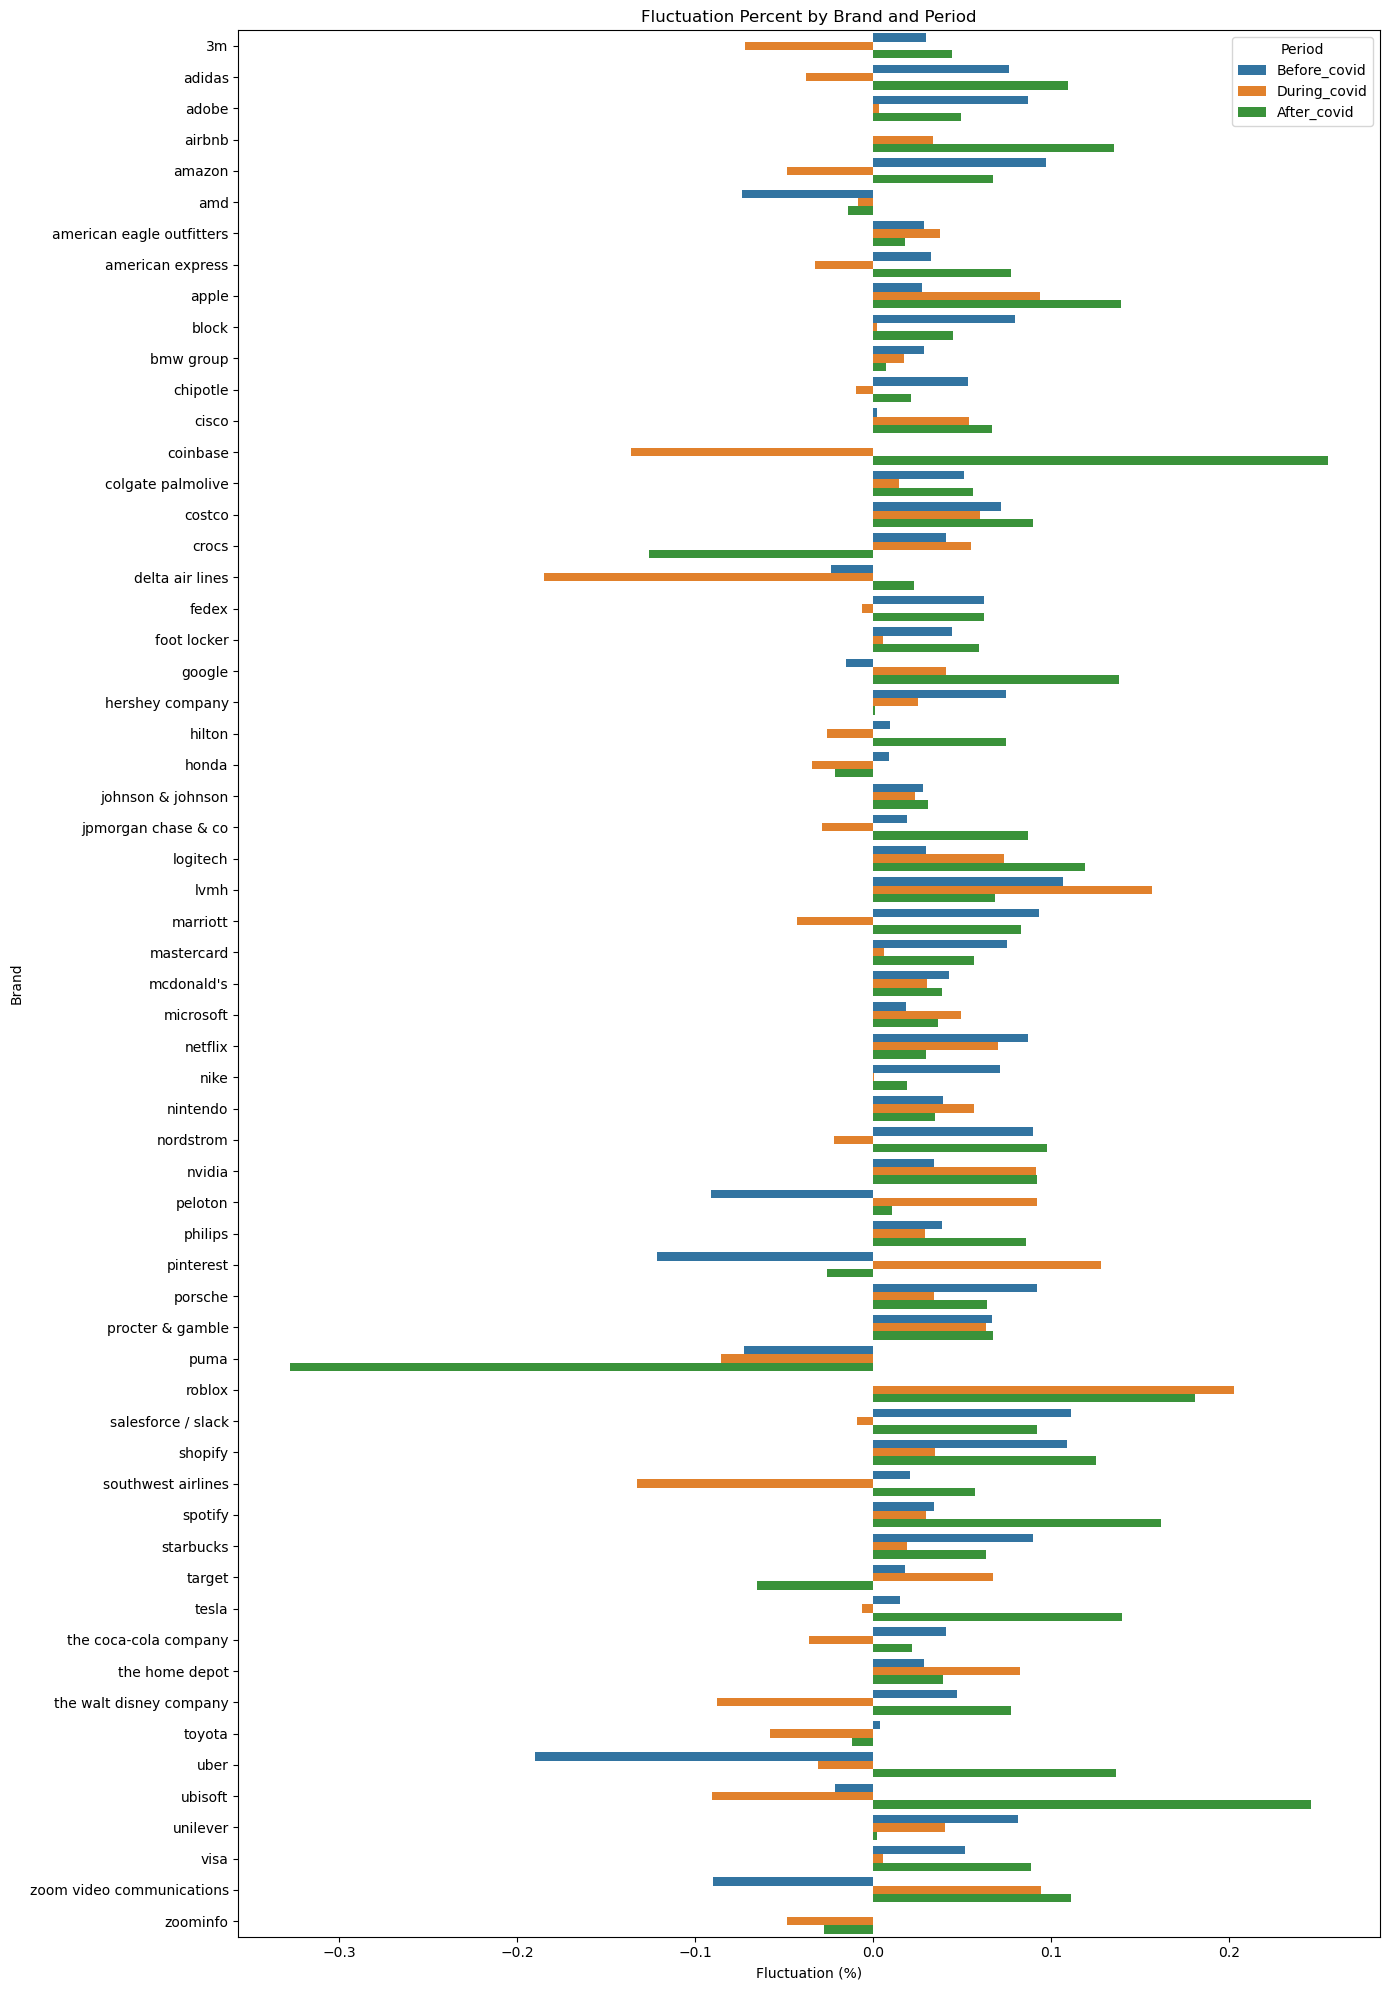

In [ ]:
plt.figure(figsize=(14, 20))
sns.barplot(data=melted, x="Fluctuation", y="Brand_Name", hue="Period")

plt.title("Fluctuation Percent by Brand and Period")
plt.xlabel("Fluctuation (%)")
plt.ylabel("Brand")
plt.legend(title="Period", loc="upper right")
plt.tight_layout()
plt.show()


##  Fluctuation Analysis of Brand Stocks Across COVID-19 Periods--
# analysis-Overall, the COVID-19 pandemic had a considerable impact on stock fluctuations across brands. The pre-pandemic period generally showed more
# stable or stronger fluctuation activity. While the post-COVID period marked a turning point for several brands that recovered or grew beyond their
# previous levels, some brands still struggled to bounce back, highlighting the uneven recovery across sectors.

1/Brands like **3M, Amazon, Apple, Airbnb, Block and Adobe** displayed strong recovery post-COVID, with positive fluctuation growth, indicating resilience and adaptability to post-pandemic market demands.

2/In contrast, some brands such as AMD, American Eagle Outfitters,American Express, BMW Group, Pinterest, and Adidas showed and others showed that they
couldn't fully recover even after COVID, with lower fluctuation percentages that suggest long-term effects or difficulty adjusting to the new market
environment.


In [ ]:
filtered=w_s_prices[(w_s_prices['Date'].dt.year >= 2016) & (w_s_prices['Date'].dt.year <= 2019)]
df= filtered.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
sorted_df=df.sort_values(by=["Brand_Name","year"])
sorted_df["YoY_Growth"] =sorted_df.groupby("Brand_Name")["Turnover"].pct_change()
sorted_df

,year,Brand_Name,Turnover,YoY_Growth
0,2016,3m,6.739959e+10,NaN
52,2017,3m,7.613629e+10,0.129625
104,2018,3m,1.126629e+11,0.479754
157,2019,3m,1.038172e+11,-0.078515
1,2016,adidas,1.671159e+09,NaN
...,...,...,...,...
51,2016,visa,1.764264e+11,NaN
103,2017,visa,1.797296e+11,0.018723
156,2018,visa,2.747842e+11,0.528876
212,2019,visa,3.061194e+11,0.114036


In [ ]:
filtered_dff=w_s_prices[(w_s_prices['Date'].dt.year >= 2023) & (w_s_prices['Date'].dt.year <= 2025)]
df_2= filtered_dff.groupby(["year", "Brand_Name"])["Turnover"].sum().reset_index()
sorted_df_2=df_2.sort_values(by=["Brand_Name","year"])
sorted_df_2["YoY_Growth"] =sorted_df.groupby("Brand_Name")["Turnover"].pct_change()
sorted_df_2

,year,Brand_Name,Turnover,YoY_Growth
0,2023,3m,9.180396e+10,NaN
61,2024,3m,1.361216e+11,-0.083715
122,2025,3m,3.434669e+10,0.500677
1,2023,adidas,1.366610e+09,NaN
62,2024,adidas,1.784698e+09,-0.223438
...,...,...,...,...
120,2024,zoom video communications,6.321208e+10,0.411661
181,2025,zoom video communications,1.191916e+10,-0.423695
60,2023,zoominfo,3.239672e+10,5.318541
121,2024,zoominfo,2.457006e+10,-0.047925


In [ ]:
before_covid_growth = sorted_df.groupby("Brand_Name")["YoY_Growth"].mean().dropna().reset_index()
before_covid_growth.rename(columns={"YoY_Growth": "Before_Covid_Growth"}, inplace=True)

after_covid_growth = sorted_df_2 .groupby("Brand_Name")["YoY_Growth"].mean().dropna().reset_index()
after_covid_growth.rename(columns={"YoY_Growth": "After_Covid_Growth"}, inplace=True)

In [ ]:
before_covid_growth

,Brand_Name,Before_Covid_Growth
0,3m,0.176955
1,adidas,-0.049472
2,adobe,0.480132
3,amazon,0.550808
4,amd,1.455252
5,american eagle outfitters,0.055546
6,american express,0.056323
7,apple,0.182471
8,block,2.412452
9,bmw group,0.144034


In [ ]:
merged_df=pd.merge(before_covid_growth,after_covid_growth,on="Brand_Name",how="inner")
merged_df

,Brand_Name,Before_Covid_Growth,After_Covid_Growth
0,3m,0.176955,0.208481
1,adidas,-0.049472,-0.036664
2,adobe,0.480132,0.292698
3,amazon,0.550808,0.413872
4,amd,1.455252,0.243568
5,american eagle outfitters,0.055546,-0.094931
6,american express,0.056323,0.470969
7,apple,0.182471,0.124654
8,block,2.412452,0.435686
9,bmw group,0.144034,0.084642


## H₀: μ_growth_before-covid = μ_growth_after-covid
## H₁: μ_growth_after-covid > μ_growth_before-covid

## Manually:-

In [ ]:
diffs=merged_df["After_Covid_Growth"].dropna()-merged_df["Before_Covid_Growth"].dropna()
mean_diff=diffs.mean()
std_diff=diffs.std()
n=len(diffs)
dof=n-1
diffs

0     0.031527
1     0.012808
2    -0.187435
3    -0.136937
4    -1.211684
5    -0.150477
6     0.414646
7    -0.057817
8    -1.976766
9    -0.059392
10    0.568186
11    0.927913
12    0.134113
13    0.100006
14   -0.580298
15   -0.030855
16    0.871702
17    0.004262
18    2.544562
19    0.313658
20    0.056006
21   -0.068278
22   -0.372426
23    1.443839
24    0.222565
25   -0.248259
26   -0.041738
27    0.838897
28   -0.016613
29    2.543301
30    2.671976
31   -0.146204
32    0.328542
33    0.542935
34   -0.950606
35   -0.071042
36    1.688444
37    0.189562
38   -2.285610
39    0.022631
40   -1.863320
41    0.914817
42    0.619504
43    0.245403
44    0.577680
45   -0.198458
46    0.963523
47   -0.176298
48   -0.400617
49    0.647059
50   -3.221781
51    0.309952
52   -0.315903
dtype: float64

In [ ]:
(print(len(diffs.dropna())))
(print(diffs.nunique()))

53
53


In [ ]:
if len(diffs.dropna()) >= 3 and diffs.nunique() > 1:
    shapiro_test = stats.shapiro(diffs)
    print("Shapiro-Wilk Test:")
    print("Test statistic:", shapiro_test.statistic)
    print("p-value:", shapiro_test.pvalue)
else:
    print("Not enough data or no variation for Shapiro-Wilk test.")


Shapiro-Wilk Test:
Test statistic: 0.9011857377276223
p-value: 0.00035462531943984075


In [ ]:
t_statistic=mean_diff/(std_diff/np.sqrt(n))
p_value=stats.t.cdf(t_statistic,dof)
print('p_value:',p_value)
alpha=0.05
if shapiro_test.pvalue < alpha:
    print("data of difference is not normal")
else:
    print("data of differnce is normal")

if p_value < alpha:
    print("Reject the H_0")
else:
    print("Fail to reject the H_0")

p_value: 0.7815512723268525
data of difference is not normal
Fail to reject the H_0


## Professional process:-

In [ ]:
from scipy.stats import ttest_rel
t_stat, p_value = ttest_rel(merged_df["Before_Covid_Growth"], merged_df["After_Covid_Growth"])
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.7834832943735429
P-value: 0.436897455346295


In [ ]:
alpha=0.05
if p_value < alpha:
    print("Reject the H_0")
else:
    print("Fail to reject the H_0")

Fail to reject the H_0


## Analysis of this Hypothesis test:

A **paired sample t-test** was conducted to evaluate **whether the company's growth rates increased after COVID-19.**
The **result (p-value = 0.782) indicated no statistically significant difference**, thus we fail to reject the null hypothesis and conclude that the **post-COVID growth rates did not show a meaningful increase.** means both means are same & it seems like the high performormed companies after covid had strong recovery but they did not performed very well to increase the growth rate to beat the growth rate they had in pre pandemic time..

## Correlation-

In [ ]:
w_s_prices.corr(numeric_only=True)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999922,0.999884,0.999815,-0.073580,0.019096,0.000515
High,0.999922,1.000000,0.999846,0.999896,-0.073272,0.018962,0.000552
Low,0.999884,0.999846,1.000000,0.999921,-0.073962,0.019228,-0.000593
Close,0.999815,0.999896,0.999921,1.000000,-0.073610,0.019101,-0.000491
Volume,-0.073580,-0.073272,-0.073962,-0.073610,1.000000,-0.009274,0.003780
Dividends,0.019096,0.018962,0.019228,0.019101,-0.009274,1.000000,-0.000366
Stock Splits,0.000515,0.000552,-0.000593,-0.000491,0.003780,-0.000366,1.000000


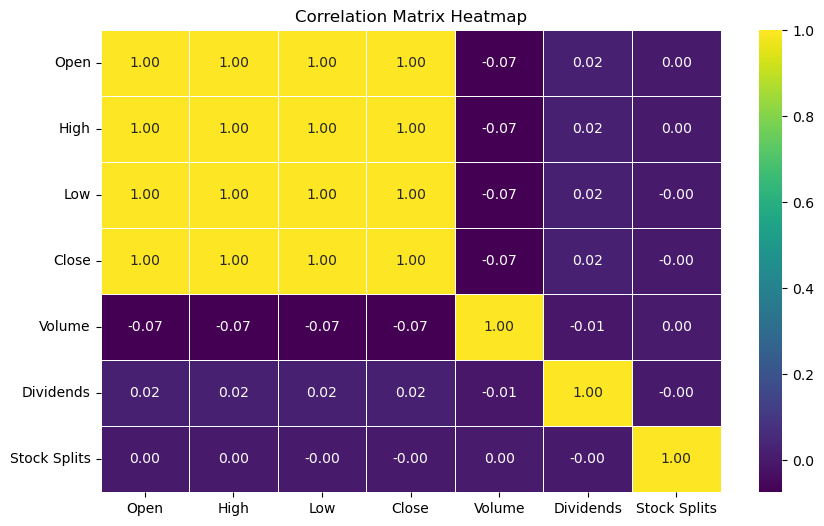

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)

plt.title("Correlation Matrix Heatmap")
plt.show()


# Analysis-
# The correlation matrix highlights strong interdependence among stock price metrics (Open, High, Low, Close), while showing very weak or no
# correlation between prices and other features like Volume, Dividends, and Stock Splits. This suggests that while price points move together
# consistently, other factors operate more independently and may require separate analysis.

In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa


## H₀: Mean of Closing prices is equal between all industries
## H₁: Mean of Closing prices differs between all industries

In [ ]:
samples=[]
for i in w_s_prices["Industry_Tag"].unique():
    filtered=w_s_prices[w_s_prices["Industry_Tag"]==i]["Close"].dropna().values
    samples.append(filtered)
samples

[array([ 6.21000004,  6.21000004,  6.32999992, ..., 25.10000038,
        25.23999977, 25.76000023]),
 array([99.83999634, 18.65999985, 99.83999634, ...,  3.85143399,
         3.88676786,  3.95743704]),
 array([ 71.43000031, 106.48000336, 185.05999756, ...,   2.43776464,
         13.58238411,  14.78179741]),
 array([891.10998535, 891.10998535, 105.51000214, ...,  25.48481178,
         24.46928215,  23.11525345]),
 array([ 27.55999947,  76.26999664, 100.30999756, ...,  36.20560455,
         16.27467537,   0.84832299]),
 array([ 24.45000076, 376.79998779, 964.30999756, ...,  30.79912949,
         40.08325577,  23.07540131]),
 array([146.30000305, 146.30000305, 146.94000244, ...,  24.47753716,
         23.7884903 ,  24.77285576]),
 array([253.91999817, 253.91999817, 249.78999329, ...,  35.84158707,
         35.04980469,  36.2638588 ]),
 array([217.44999695, 217.44999695, 214.16999817, ..., 342.        ,
        322.75      , 328.27999878]),
 array([175.94999695,  59.22999954,  96.73999786,

In [ ]:
from scipy.stats import levene,f_oneway
levene_test_stat, levene_pval = levene(*samples)
print("Levene test statistic:", levene_test_stat)
print("Levene test p-value:", levene_pval)
alpha=0.05
if  levene_pval<= alpha:
    print("variances are not equal")
else:
    print("variances are equal")

Levene test statistic: 2360.3873447991864
Levene test p-value: 0.0
variances are not equal


In [ ]:
f_stat,p_value=stats.f_oneway(*samples)
print("f_stat:",f_stat)
print("p_value:", p_value)

f_stat: 2827.2776198799693
p_value: 0.0


In [ ]:
alpha=0.05
if p_value<= alpha:
    print("Reject the H_0")
else:
    print("Fail to reject the H_0")

Reject the H_0


## Analysis of this Hypothesis test:-

An **ANOVA** test was performed to determine **if the mean closing prices differ across industries.**
The **result (p-value < 0.05) led to the rejection of the null hypothesis,** indicating that **there are significant differences** in mean closing prices among the industries


In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
199963,2010-09-15 04:00:00+00:00,14.948464,15.170539,14.913764,14.983163,60902400.0,0.0,0.0,cisco,CSCO,technology,usa
199964,2010-09-15 04:00:00+00:00,74.403766,75.675098,74.175801,75.350693,2022100.0,0.0,0.0,fedex,FDX,logistics,usa
199965,2010-09-15 04:00:00+00:00,1.928062,1.928062,1.928062,1.928062,200.0,0.0,0.0,ubisoft,UBSFY,gaming,france
199966,2010-09-15 04:00:00+00:00,7.244000,7.281000,7.178000,7.272500,98072000.0,0.0,0.0,amazon,AMZN,e-commerce,usa


In [ ]:
w_s_prices_sorted=w_s_prices.sort_values(['Brand_Name','Date'])
daily_returns=w_s_prices_sorted.groupby('Brand_Name')['Close'].pct_change()
w_s_prices_sorted['Daily_Return']=daily_returns
std_daily_returns=w_s_prices_sorted.groupby("Brand_Name")["Daily_Return"].std().dropna()
std_daily_returns

,Daily_Return
Brand_Name,
3m,0.015047
adidas,0.020048
adobe,0.019983
airbnb,0.030210
amazon,0.020422
...,...
ubisoft,0.027777
unilever,0.012734
visa,0.015347


<ipython-input-30-d6ce738d8c16>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_std.values,y=sorted_std.index,palette="viridis",orient='h')


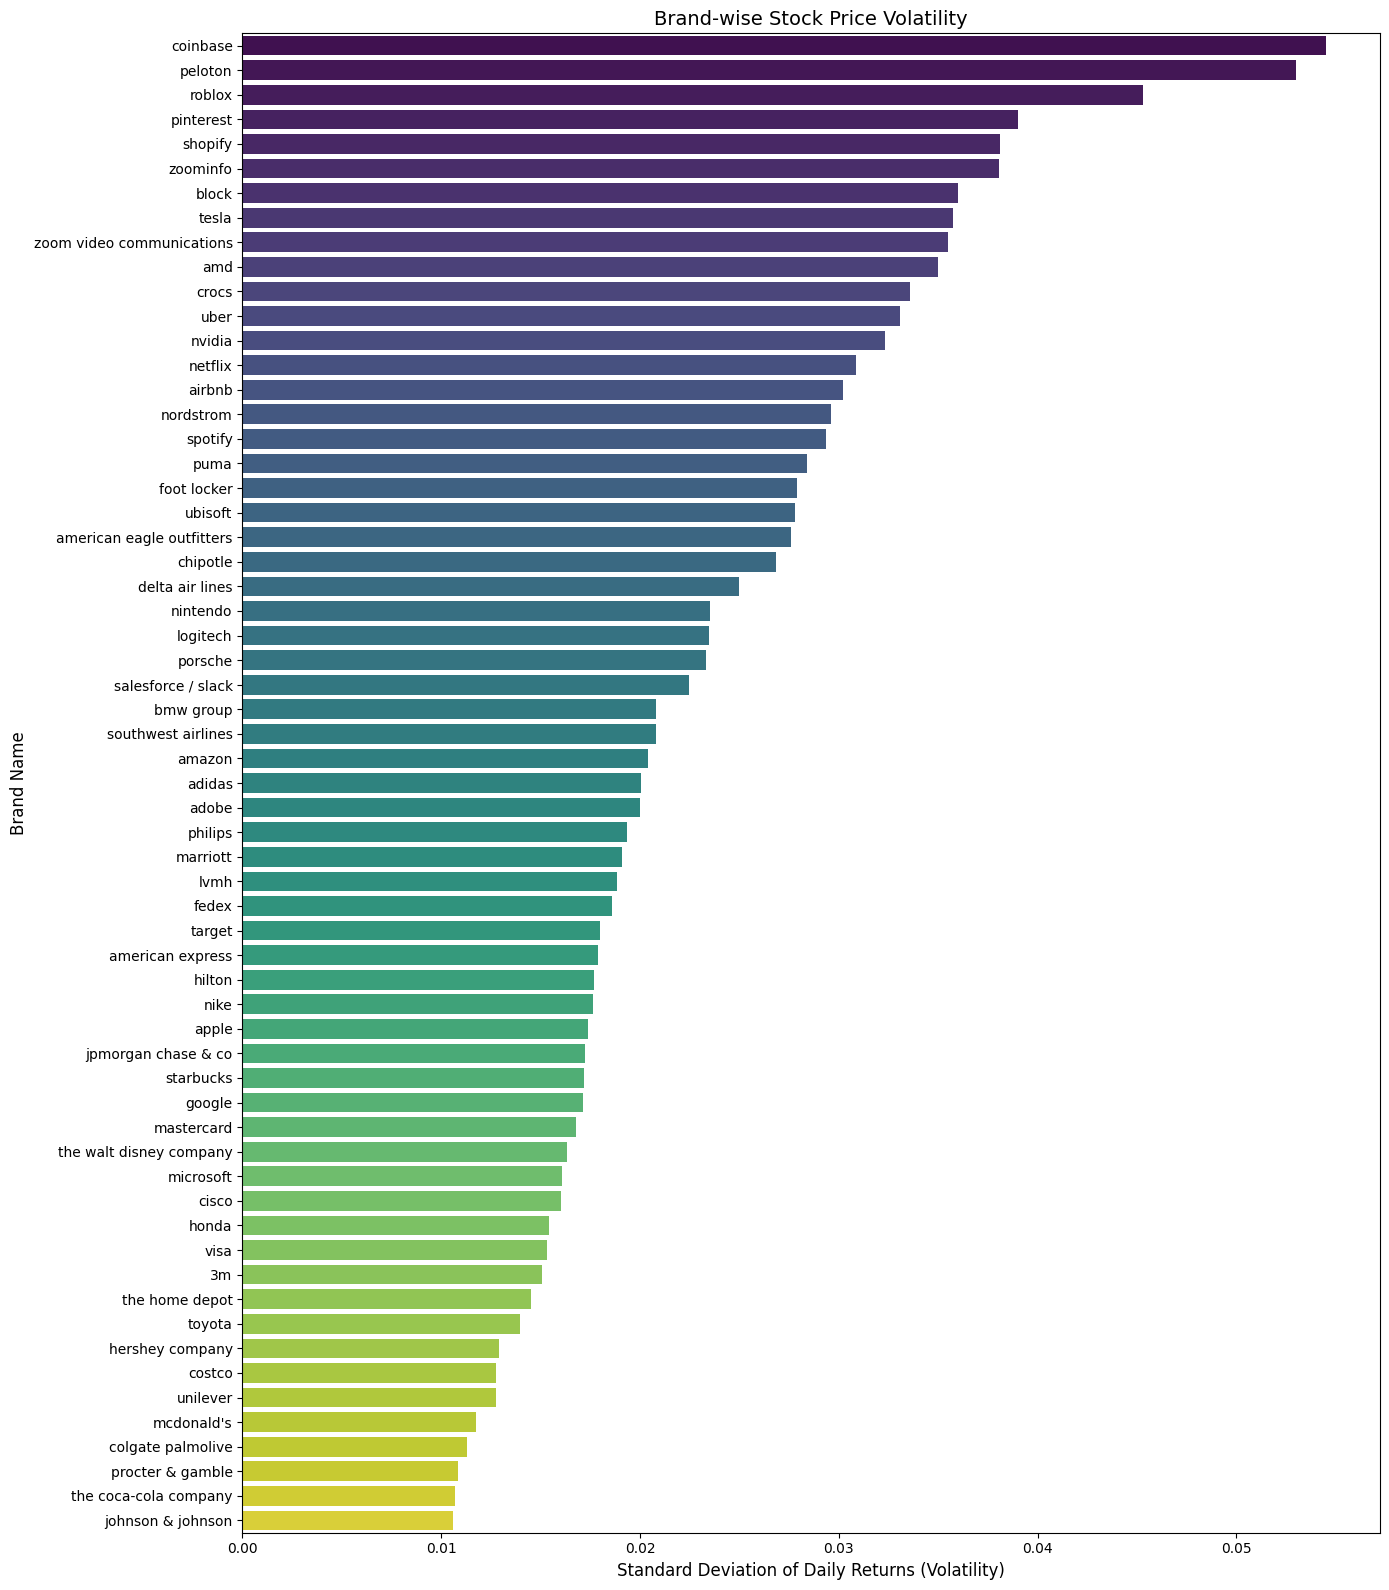

<Figure size 640x480 with 0 Axes>

In [ ]:
sorted_std=std_daily_returns.sort_values(ascending=False)

plt.figure(figsize=(14,16))
sns.barplot(x=sorted_std.values,y=sorted_std.index,palette="viridis",orient='h')
plt.xlabel("Standard Deviation of Daily Returns (Volatility)",fontsize=12)
plt.ylabel("Brand Name",fontsize=12)
plt.title("Brand-wise Stock Price Volatility",fontsize=14)
plt.tight_layout()
plt.show()
plt.savefig("Standard Deviation of Daily Returns (Volatility).jpeg")


**Voladility test**-Volatility means how much the stock price goes up and down(fluctuates)from one day to the next.
 In this test I use std() beacause it measures how spread out the daily returns are from the average(mean).It gives one number that tells us how much the returns are jumping around.
Higher std=more risky, Lower std=more stable.





### **Analysis of Brand-wise Stock Price Volatility**

1. **Highest Volatility(Risky Companies):**  
   #Companies like **Coinbase**, **Peloton**, **Roblox**, **Pinterest**, and **Shopify** exhibit the highest volatility.  
   #These brands show a high standard deviation in daily returns, implying **frequent and significant price fluctuations**.  
   #They are **riskier investments** but may offer **greater potential returns** for aggressive investors.

2. **Moderate Volatility(Balanced Risk):**  
   #Brands such as **Tesla**, **Uber**, **Zoom Video Communications**, **Spotify**, and **Netflix** show moderate volatility.  
   #These companies offer a **balance between risk and potential reward**, with some fluctuation but less extreme behavior.

3. **Lowest Volatility(Stable Companies):**  
   **Johnson & Johnson**, **The Coca-Cola Company**, **Procter & Gamble**, **Colgate-Palmolive**, and **McDonald's** show the **lowest price volatility**.  
   #These are **stable, defensive stocks** ideal for **low-risk, long-term investment strategies**.

### **Conclusion & Suggestion**

For **low-risk investment**,focus on stable companies with low volatility.  
For **high-risk, high-reward strategies**, consider investing in the top volatile brands.  



In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2024-10-17 04:00:00+00:00,172.179993,173.679993,171.759995,172.279999,7041600.0,0.0,0.0,procter & gamble,PG,consumer goods,usa
7275,2024-10-17 04:00:00+00:00,506.510010,507.500000,495.230011,496.829987,2767800.0,0.0,0.0,adobe,ADBE,technology,usa
7276,2024-10-17 04:00:00+00:00,59.240002,59.389999,58.520000,58.860001,6325100.0,0.0,0.0,chipotle,CMG,food,usa
7277,2024-10-17 04:00:00+00:00,42.599998,42.599998,42.599998,42.599998,0.0,0.0,0.0,puma,PMMAF,apparel,germany


In [ ]:
w_s_prices["Country"].unique()

array(['usa', 'netherlands', 'france', 'germany', 'japan', 'canada',
       'switzerland', nan], dtype=object)

In [ ]:
sorted=w_s_prices.sort_values(by=["Brand_Name","Date"])
daily_returns=sorted.groupby("Brand_Name")["Close"].pct_change()
w_s_prices["Daily_Return"]=daily_returns
avg_return_per_country=w_s_prices.groupby("Country")["Daily_Return"].mean()
avg_return_per_country=avg_return_per_country.sort_values(ascending=False).reset_index()
avg_return_per_country

,Country,Daily_Return
0,canada,0.002104
1,switzerland,0.001083
2,japan,0.001059
3,france,0.000537
4,usa,0.000165
5,germany,-0.000037
6,netherlands,-0.000695


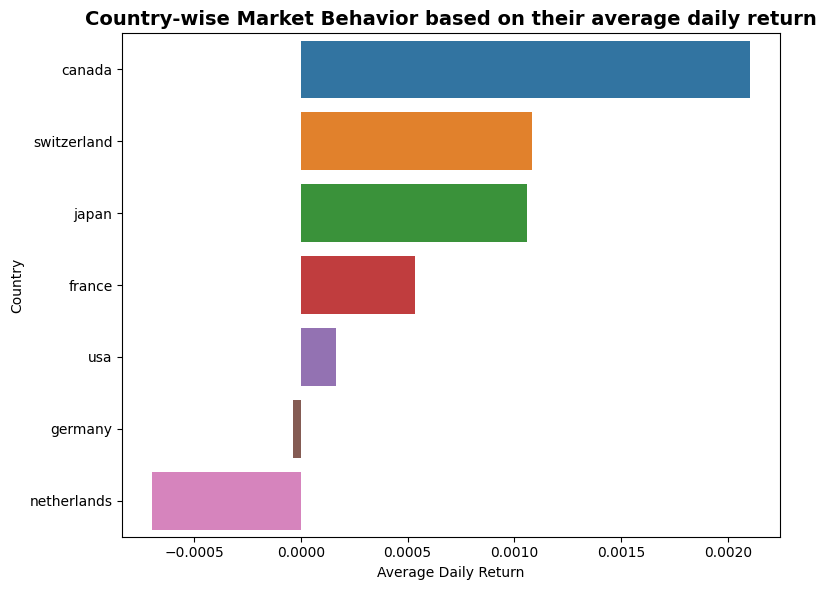

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=avg_return_per_country,
    y="Country",
    x="Daily_Return",
    hue="Country"
)

plt.title("Country-wise Market Behavior based on their average daily return", fontsize=14, weight='bold')
plt.xlabel("Average Daily Return")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


:

##**Analysis** – Country-wise Market Behavior Based on Average Daily Return
**The graph highlights the average daily return of stocks grouped by country.**

* Canada shows the highest positive average return, indicating strong short-term growth potential in its stock market.

* Switzerland, Japan, and France also demonstrate consistent positive returns, suggesting relatively stable and profitable markets.

* USA and Germany show minimal average returns, indicating low short-term movement, possibly reflecting market maturity or lower volatility.

* Netherlands records a negative average return, raising potential concerns about recent market performance or volatility in that region.

#Conclusion
Investors aiming for short-term gains might consider markets like Canada or Switzerland, whereas the Netherlands may require cautious analysis due to recent negative trends.


In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa
...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa


In [ ]:
w_s_prices["year"]=w_s_prices["Date"].dt.year
sorted=w_s_prices.sort_values(by=["year","Industry_Tag"])
avg_over_year_per_industry=sorted.groupby(["year","Industry_Tag"])["Close"].mean().reset_index()
avg_over_year_per_industry

,year,Industry_Tag,Close
0,2000,apparel,3.745682
1,2000,automotive,38.623971
2,2000,aviation,13.363982
3,2000,consumer goods,14.207150
4,2000,e-commerce,2.326683
...,...,...,...
495,2025,manufacturing,145.422908
496,2025,music,552.894546
497,2025,retail,387.230182
498,2025,social media,34.454364


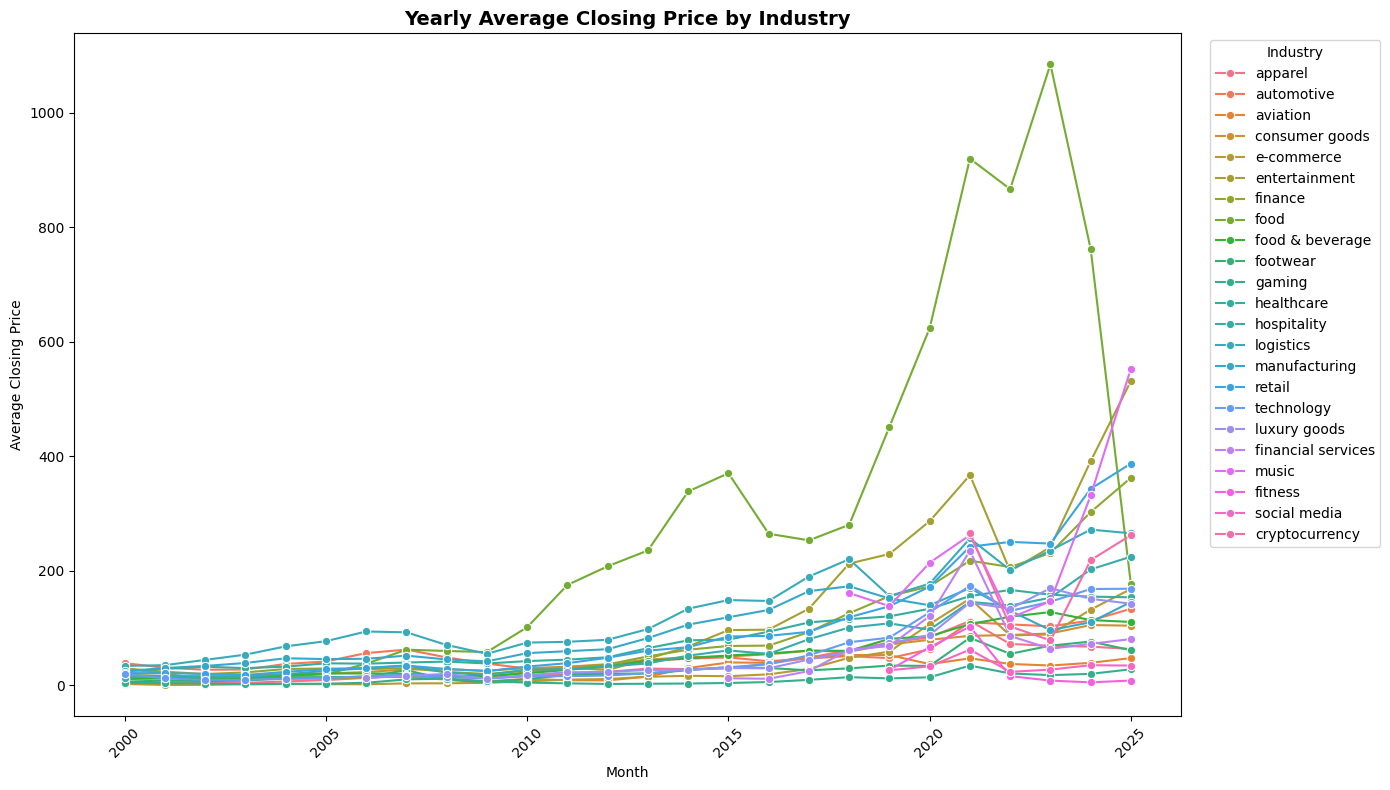

In [ ]:

plt.figure(figsize=(14, 8))
sns.lineplot(data=avg_over_year_per_industry, x="year", y="Close", hue="Industry_Tag",marker="o")

plt.title("Yearly Average Closing Price by Industry", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

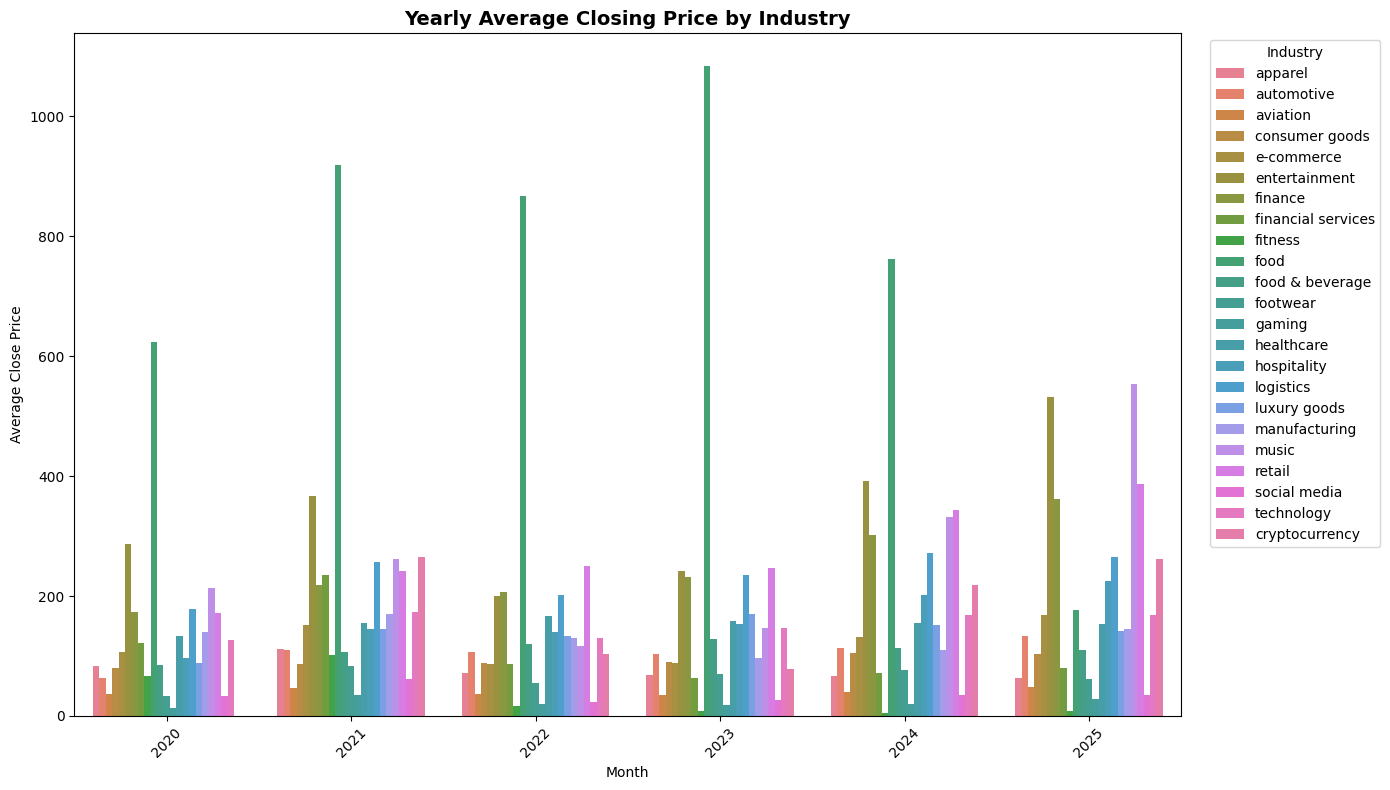

In [ ]:
filtered = avg_over_year_per_industry[(avg_over_year_per_industry["year"] >= 2020) & (avg_over_year_per_industry["year"]<= 2025)]

plt.figure(figsize=(14, 8))
sns.barplot(data=filtered, x="year", y="Close", hue="Industry_Tag")
plt.title("Yearly Average Closing Price by Industry", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Close Price")
plt.xticks(rotation=45)
plt.legend(title="Industry", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
w_s_prices["year"]=w_s_prices["Date"].dt.year
w_s_prices["year"].unique()

array([2025, 2024, 2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015,
       2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004,
       2003, 2002, 2001, 2000], dtype=int32)

In [ ]:
w_s_prices

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Brand_Name,Ticker,Industry_Tag,Country,year
0,2025-03-07 05:00:00+00:00,6.280000,6.397100,5.850000,6.210000,22424254.0,0.0,0.0,peloton,PTON,fitness,usa,2025
1,2025-03-07 05:00:00+00:00,99.320000,100.040001,95.190002,99.839996,1860900.0,0.0,0.0,crocs,CROX,footwear,usa,2025
2,2025-03-07 05:00:00+00:00,69.650002,71.820000,69.650002,71.430000,28390600.0,0.0,0.0,the coca-cola company,KO,food & beverage,usa,2025
3,2025-03-07 05:00:00+00:00,897.640015,904.890015,858.070007,891.109985,7734200.0,0.0,0.0,netflix,NFLX,entertainment,usa,2025
4,2025-03-07 05:00:00+00:00,17.910000,18.719999,17.530001,18.660000,4346800.0,0.0,0.0,foot locker,FL,footwear,usa,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304600,2000-01-03 05:00:00+00:00,35.788786,36.844503,34.627498,36.263859,1734000.0,0.0,0.0,fedex,FDX,logistics,usa,2000
304601,2000-01-03 05:00:00+00:00,34.729481,34.729481,32.934947,33.198849,6471267.0,0.0,0.0,american express,AXP,finance,usa,2000
304602,2000-01-03 05:00:00+00:00,22.361069,22.431057,21.801168,22.186100,4520600.0,0.0,0.0,mcdonald's,MCD,food,usa,2000
304603,2000-01-03 05:00:00+00:00,11.826695,11.850113,11.405149,11.428568,2506717.0,0.0,0.0,marriott,MAR,hospitality,usa,2000


In [ ]:
active_years=w_s_prices.groupby("Brand_Name")["year"].nunique().reset_index()
active_years.columns=["Brand_Name","Active_Years"]
active_years

,Brand_Name,Active_Years
0,3m,26
1,adidas,20
2,adobe,26
3,airbnb,6
4,amazon,26
...,...,...
56,ubisoft,16
57,unilever,26
58,visa,18
59,zoom video communications,7


<ipython-input-20-813883824c10>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=active_years_sorted, x="Active_Years", y="Brand_Name", palette="viridis")


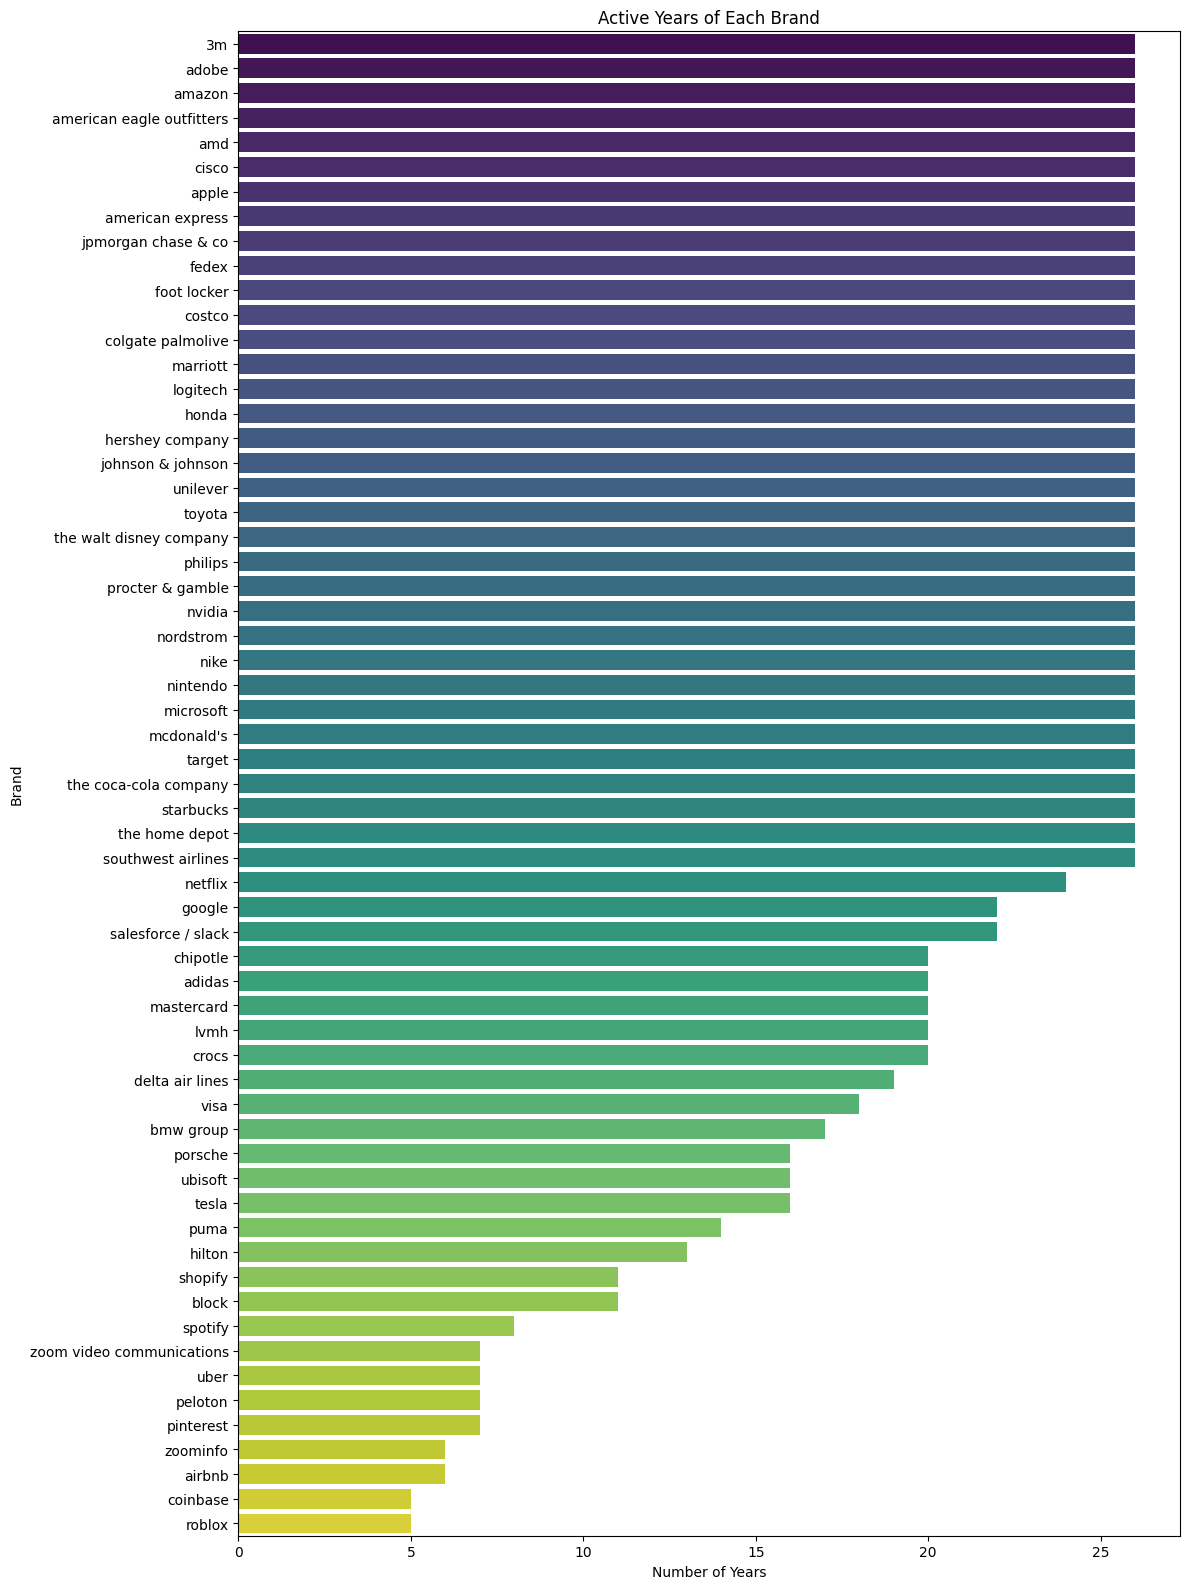

In [ ]:
active_years_sorted=active_years.sort_values(by="Active_Years",ascending=False)
plt.figure(figsize=(12,16))
sns.barplot(data=active_years_sorted,x="Active_Years",y="Brand_Name",palette="viridis")
plt.title("Active Years of Each Brand")
plt.xlabel("Number of Years")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


In [ ]:
w_s_prices["year"].nunique()

26